In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostRegressor

ada_boosting = AdaBoostRegressor(random_state=0,
                                 n_estimators=12,
                                 learning_rate=1.52,
                                 loss='square')

ada_boosting.fit(X_train, y_train)

print(f"""train: {ada_boosting.score(X_train, y_train)}\ntest: {ada_boosting.score(X_test, y_test)}""")

train: 0.9010014438093246
test: 0.7297940407450434


In [10]:
ada_boosting.get_params()

{'base_estimator': None,
 'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

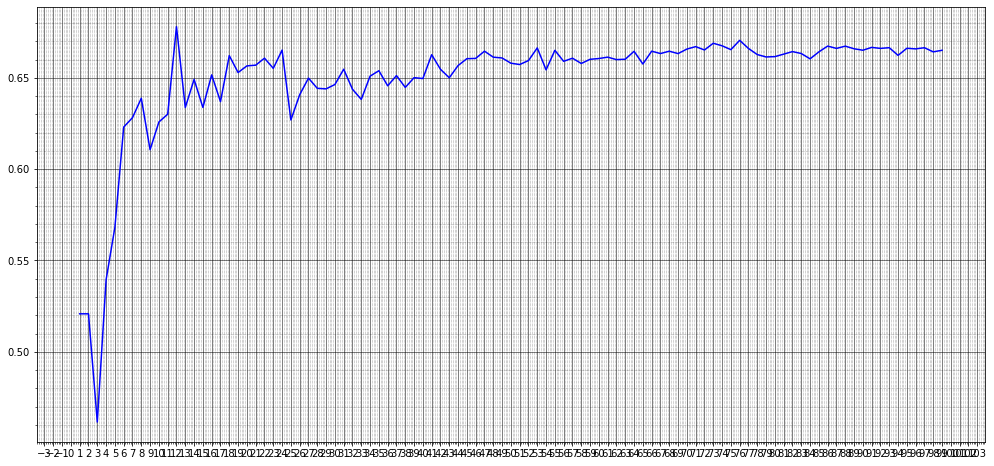

In [17]:
n_estimator = np.arange(1, 100, 1)
results = []

for feature in n_estimator:
    rf = AdaBoostRegressor(random_state=0, n_estimators=feature, loss='square')
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(n_estimator, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

In [18]:
print(results[results.index(max(results))])
print(n_estimator[results.index(max(results))])

0.6780115548291121
12


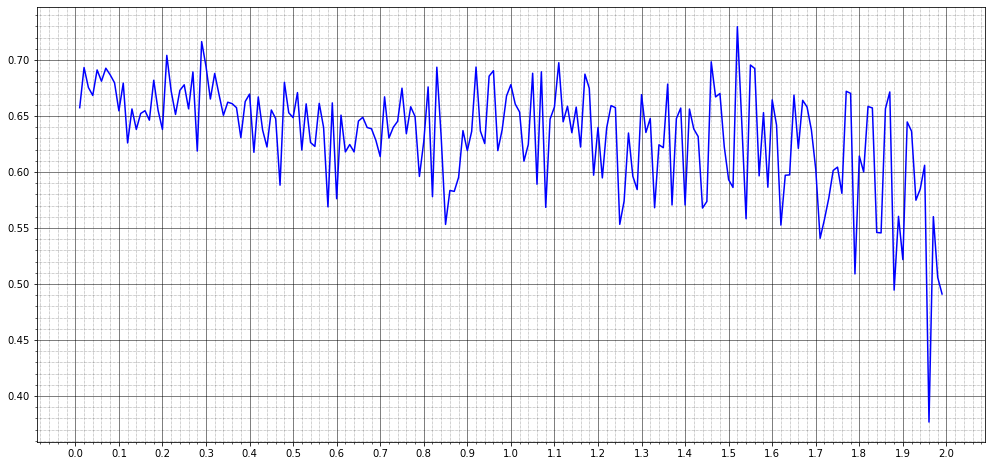

In [24]:
learning_rates = np.arange(0.01, 2, 0.01)
results = []

for feature in learning_rates:
    rf = AdaBoostRegressor(random_state=0, n_estimators=12, learning_rate=feature, loss='square')
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(learning_rates, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

In [25]:
print(results[results.index(max(results))])
print(learning_rates[results.index(max(results))])

0.7297940407450434
1.52
